# Pruebas de la clase ImageEnhacer

En este notebook se prueban las funciones de la clase ImageEnhacer, las cuales son pensadas como una herramienta para mejorar la calidad de las imágen con el fin de obtener mejores resultados en la identificación de personas. 

In [1]:
from image_enhancer import ImageEnhancer
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Si se requiere guardar la imagen para un analisis posterior o para comparar habilitar esta variable.
WRITE_ENABLE = True

* CPU times (tiempos de CPU): Esta es la cantidad total de tiempo que la CPU ha gastado procesando tu código. Si tu código es multi-threaded (multihilos) o si usa múltiples núcleos de CPU, este tiempo puede ser significativamente mayor que el tiempo real (wall time) porque se suman los tiempos de todos los hilos o núcleos.
  
* Wall time (tiempo real): También conocido como "tiempo de reloj", es el tiempo real que pasó desde que comenzó la ejecución de la celda hasta que finalizó. Es el tiempo que, de hecho, percibirías si estuvieras mirando un reloj en tu pared.

## Original Image

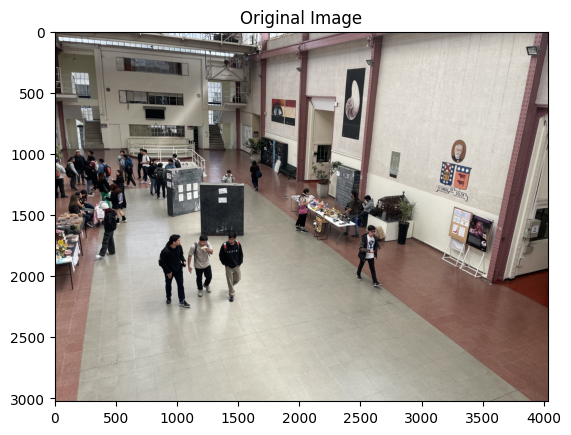

In [2]:
test_image = cv2.imread('test_image.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
original_image = deepcopy(test_image)

plt.imshow(original_image)
plt.title('Original Image')

plt.show()

## Gamma Adjusted

La corrección gamma oscurece las áreas brillantes y mejora el detalle en áreas sobreexpuestas.

CPU times: total: 78.1 ms
Wall time: 174 ms


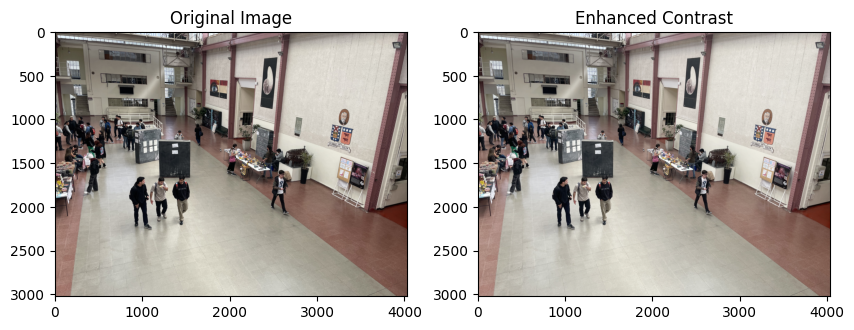

In [3]:
# 1. Enhance Contrast

%time enhanced_image = ImageEnhancer.adjust_gamma('test_image.jpg', gamma=1.2)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Contrast')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('gamma_adjusted.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))


## Gaussian Blur

El filtro Gaussiano se aplica para suavizar la imagen y reducir el ruido.

CPU times: total: 78.1 ms
Wall time: 159 ms


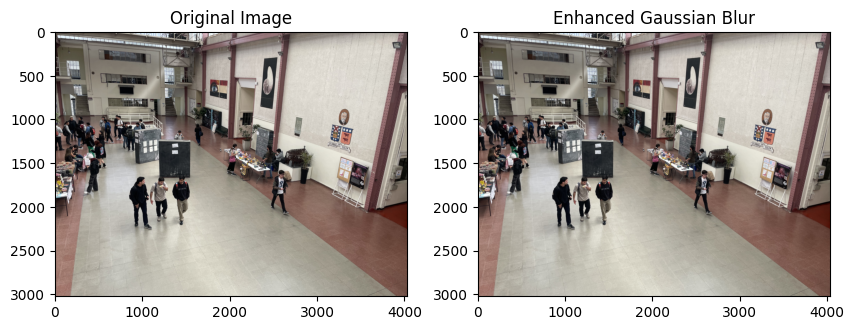

In [4]:
# 2. Enhance gaussian blur
%time enhanced_image = ImageEnhancer.apply_gaussian_blur('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Gaussian Blur')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('gaussian_blur.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## Sharpening

Se aplica un filtro de agudización para resaltar los detalles.

CPU times: total: 31.2 ms
Wall time: 32.4 ms


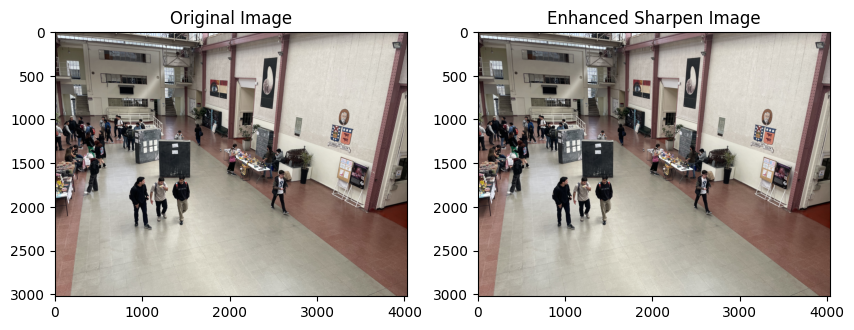

In [5]:
# 3. Sharpen Image
%time enhanced_image = ImageEnhancer.apply_sharpening(enhanced_image)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Sharpen Image')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('sharpening.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## CLAHE

Se utiliza la equalización de histograma adaptativa para mejorar el contraste en áreas locales.

CPU times: total: 406 ms
Wall time: 373 ms


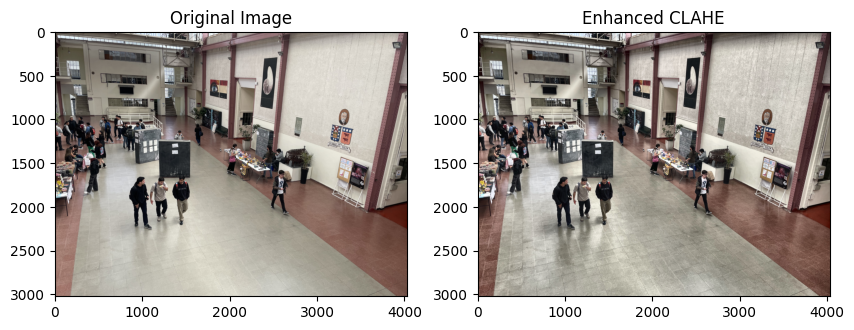

In [6]:
# 4. CLAHE (Contrast Limited Adaptive Histogram Equalization)

%time enhanced_image = ImageEnhancer.apply_clahe('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced CLAHE')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('clahe.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## Enhance black regions

Se aplica un filtro para mejorar las regiones negras aplicando contraste sobre ellas.

CPU times: total: 203 ms
Wall time: 307 ms


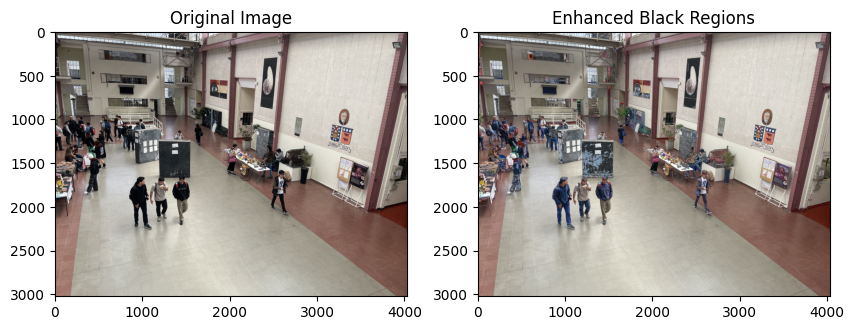

In [7]:
# 5. Apply better black regions
%time enhanced_image = ImageEnhancer.apply_better_black_regions('test_image.jpg', alpha=5)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Black Regions')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('enhance_black_regions.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## ROIs

Divide la imagen en regiones de interés (ROIs) con el fin de que el modelo tenga una información más enfocada para la identificación de personas.

CPU times: total: 109 ms
Wall time: 167 ms


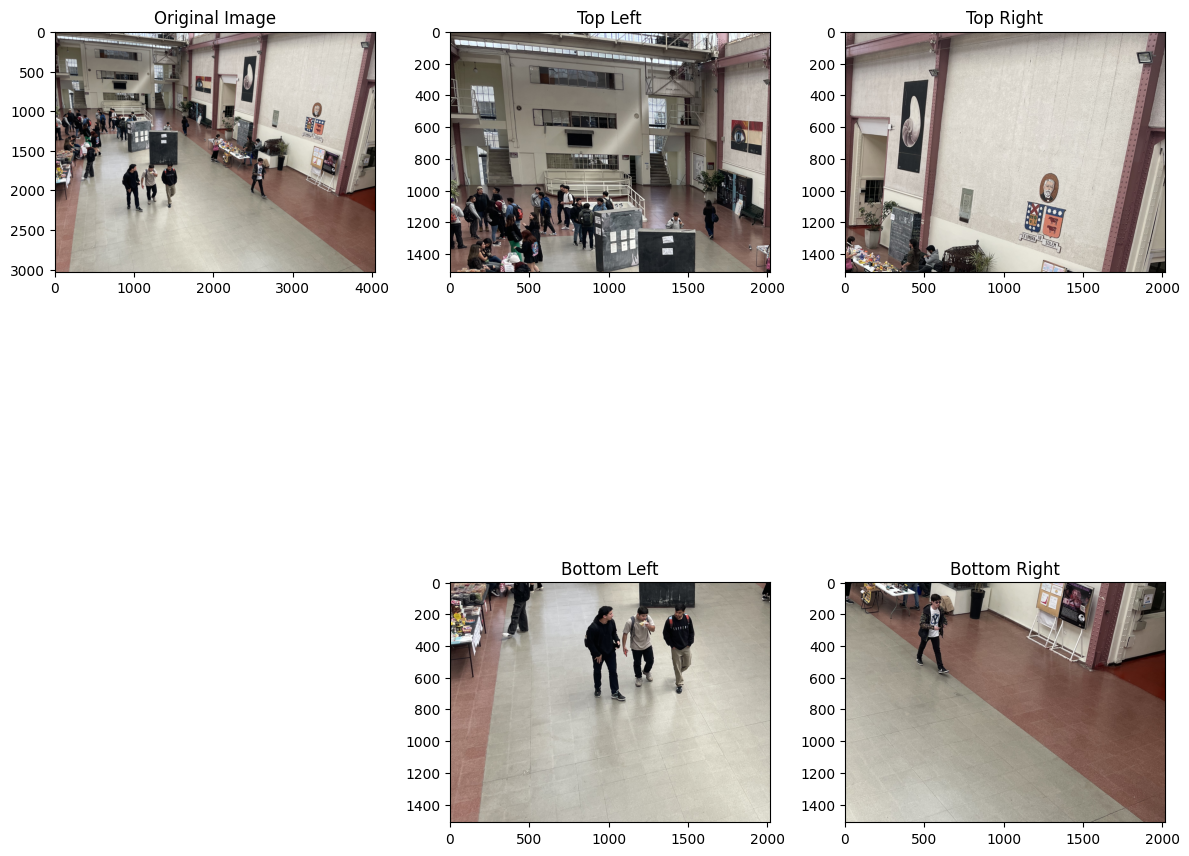

In [8]:
# 6. Split the image into 4 parts from the center
%time splits = ImageEnhancer.split_image('test_image.jpg')

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(2, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(2, 3, 2)
plt.imshow(splits[0])
plt.title('Top Left')

fig.add_subplot(2, 3, 3)
plt.imshow(splits[1])
plt.title('Top Right')

fig.add_subplot(2, 3, 5)
plt.imshow(splits[2])
plt.title('Bottom Left')

fig.add_subplot(2, 3, 6)
plt.imshow(splits[3])
plt.title('Bottom Right')

plt.tight_layout()
plt.show()

if WRITE_ENABLE:
    cv2.imwrite('split_top_left.jpg', cv2.cvtColor(splits[0], cv2.COLOR_RGB2BGR))
    cv2.imwrite('split_top_right.jpg', cv2.cvtColor(splits[1], cv2.COLOR_RGB2BGR))
    cv2.imwrite('split_bottom_left.jpg', cv2.cvtColor(splits[2], cv2.COLOR_RGB2BGR))
    cv2.imwrite('split_bottom_right.jpg', cv2.cvtColor(splits[3], cv2.COLOR_RGB2BGR))


## Bilateral Filter

Se aplica un filtro bilateral para suavizar la imagen y reducir el ruido. El valor de intensidad de los píxeles se calcula utilizando una combinación de la diferencia de intensidad de los píxeles y la diferencia de intensidad de los píxeles vecinos.

CPU times: total: 8.64 s
Wall time: 998 ms


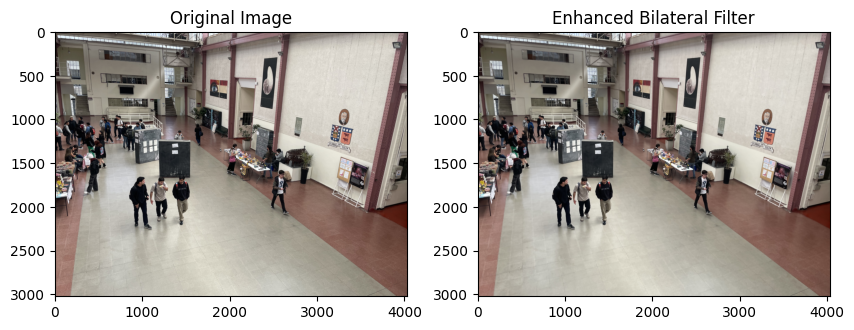

In [9]:
%time enhanced_image = ImageEnhancer.apply_bilateral_filter('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Bilateral Filter')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('bilateral_filter.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## Unsharp Mask

Es una técnica de procesamiento de imágenes utilizada para aumentar el enfoque de las imágenes. El método consiste en hacer una copia de la imagen original, aplicar un filtro de desenfoque a la copia y luego restar el resultado de la imagen original.

CPU times: total: 125 ms
Wall time: 196 ms


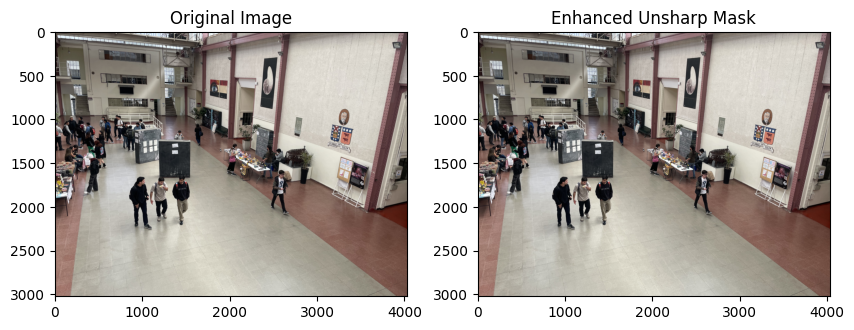

In [10]:
%time enhanced_image = ImageEnhancer.apply_unsharp_mask('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Unsharp Mask')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('unsharp_mask.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## Canny Edge Detection

CPU times: total: 297 ms
Wall time: 202 ms


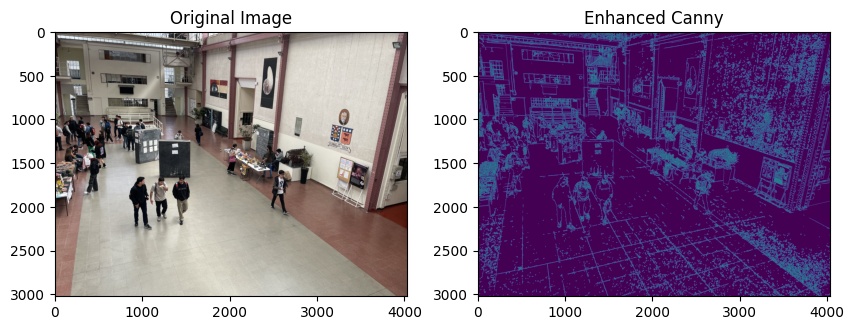

In [11]:
%time enhanced_image = ImageEnhancer.apply_canny('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Canny')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('canny.jpg', cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

## HOG 

CPU times: total: 4.5 s
Wall time: 8.68 s


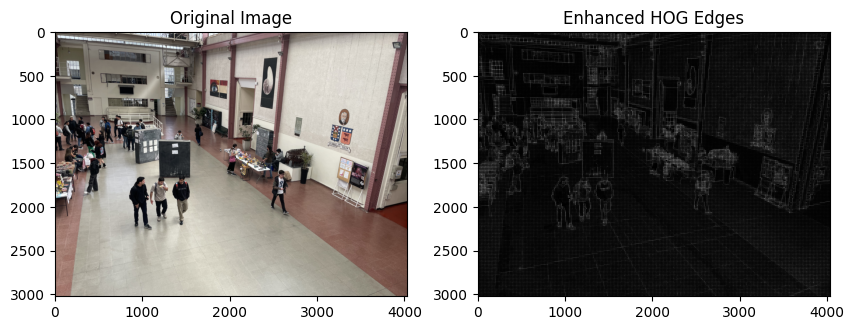

In [12]:
%time enhanced_image = ImageEnhancer.enhance_edges_with_hog('test_image.jpg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced HOG Edges')

plt.show()

if WRITE_ENABLE:
    cv2.imwrite('hog_edges.jpg', enhanced_image)

# Prueba secuencial de metodos

En esta sección se prueba la ejecución secuencial de los métodos de la clase ImageEnhacer, de una manera no determinística.

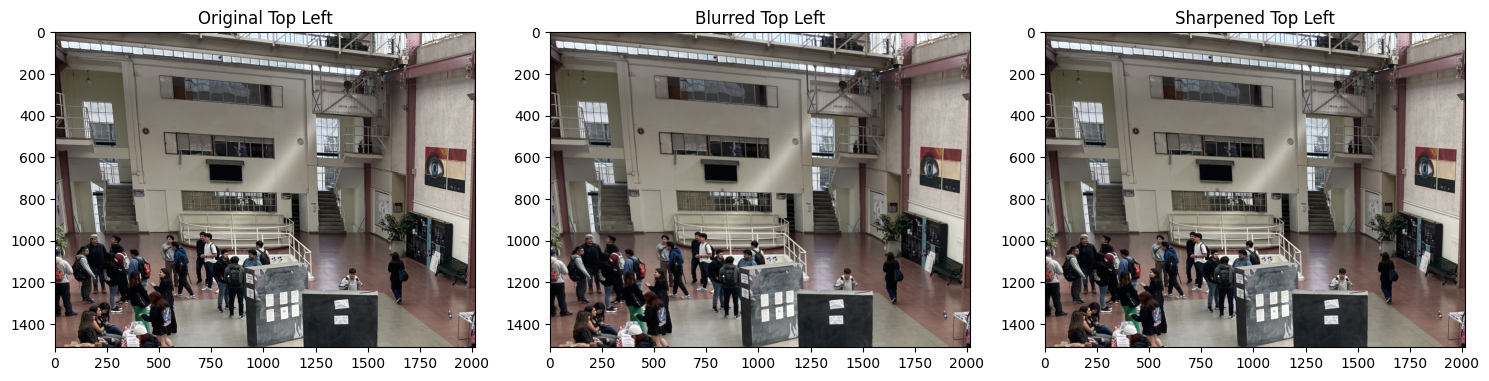

CPU times: total: 922 ms
Wall time: 1.63 s


True

In [13]:
%%time
# Split the image into 4 parts from the center
splits = ImageEnhancer.split_image('test_image.jpg')

# Apply Gaussian blur and sharpening filters to the top-left split
blurred_image = ImageEnhancer.apply_gaussian_blur(splits[0])
sharpened_image = ImageEnhancer.apply_sharpening(blurred_image)

# Display the original top-left split, blurred, and sharpened images side by side
fig = plt.figure(figsize=(15, 5))

fig.add_subplot(1, 3, 1)
plt.imshow(splits[0])
plt.title('Original Top Left')

fig.add_subplot(1, 3, 2)
plt.imshow(blurred_image)
plt.title('Blurred Top Left')

fig.add_subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.title('Sharpened Top Left')

plt.tight_layout()
plt.show()

# If you want to save the processed image
cv2.imwrite('sharpened_top_left.jpg', cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2BGR))


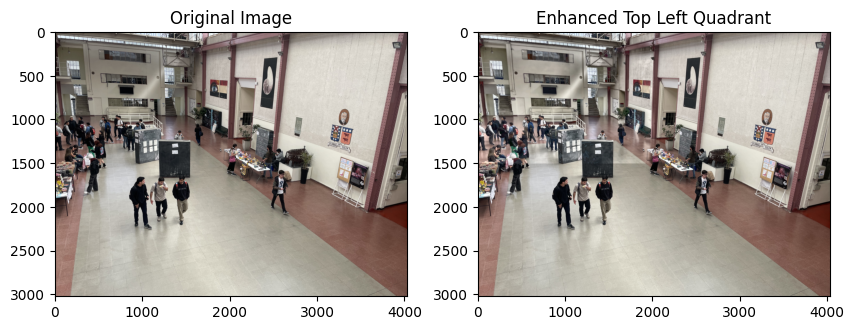

CPU times: total: 3.38 s
Wall time: 2.56 s


In [15]:
%%time 
# Load the image and get its dimensions
test_image = ImageEnhancer._load_image('test_image.jpg')
h, w, c = test_image.shape

# Extract the top-left quadrant
top_left = test_image[:h//2, :w//2]

# Apply the enhancements
top_left = ImageEnhancer.apply_bilateral_filter(top_left)
top_left = ImageEnhancer.apply_gaussian_blur(top_left)
top_left = ImageEnhancer.apply_unsharp_mask(top_left)
top_left = ImageEnhancer.adjust_gamma(top_left, gamma=1.2)  
top_left = ImageEnhancer.apply_clahe(top_left)
top_left = ImageEnhancer.apply_better_black_regions(top_left)

# Replace the original top-left quadrant with the enhanced version
test_image[:h//2, :w//2] = top_left

# Compare original and enhanced image
original_image = ImageEnhancer._load_image('test_image.jpg')

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
fig.add_subplot(1, 2, 2)
plt.imshow(test_image)
plt.title('Enhanced Top Left Quadrant')
plt.show()


# Trabajo futuro

En este notebook se han explorado distitno métodos para mejorar la calidad de las imágenes de entrada a nuestro modelo. Sin embargo, se puede explorar la posibilidad de utilizar redes neuronales para mejorar la calidad de las imágenes, como se muestra en el siguiente [link](https://towardsdatascience.com/image-super-resolution-using-convolution-neural-networks-and-auto-encoders-28c9eceadf90).

* Entre los métodos que se exploraron los más prometedores fueron unsharp mask, filtro bilateral y filtro de agudización.

* El método de ROIs fue uno de los que más mejoró el desempeño del modelo, sin embargo, hay problemas en los bordes de las ROIs con la duplicación de personas.
